***NBA Trends (EDA)***

In this project, you’ll analyze data from the NBA (National Basketball Association) and explore possible associations.

This data was originally sourced from 538’s Analysis of the Complete History Of The NBA and contains the original, unmodified data from Basketball Reference as well as several additional variables 538 added to perform their own analysis.

For this project we’ve limited the data to just 5 teams and 10 columns (plus one constructed column, point_diff, the difference between pts and opp_pts).

*Analyzing relationships between Quant and Categorical variables.*

The data has been subsetted into two smaller datasets: games from 2010 (named nba_2010) and games from 2014 (named nba_2014). To start, let’s focus on the 2010 data. 

First, lets examine data. Whats inside and how its look like.

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True, precision = 2)

nba = pd.read_csv('./nba_games.csv')

# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

print(nba_2010.head())
print(nba_2014.head())

            game_id  year_id  fran_id      opp_fran game_location  \
21717  200910270CLE     2010  Celtics     Cavaliers             A   
21718  200910280BOS     2010  Celtics       Hornets             H   
21719  200910280MIA     2010   Knicks          Heat             A   
21720  200910280MIN     2010     Nets  Timberwolves             A   
21721  200910280OKC     2010  Thunder         Kings             H   

       is_playoffs  pts  opp_pts game_result  forecast  point_diff  
21717            0   95       89           W  0.277472           6  
21718            0   92       59           W  0.814619          33  
21719            0   93      115           L  0.258755         -22  
21720            0   93       95           L  0.475155          -2  
21721            0  102       89           W  0.716764          13  
            game_id  year_id  fran_id   opp_fran game_location  is_playoffs  \
23468  201310300CLE     2014     Nets  Cavaliers             A            0   
23469  201310

Suppose you want to compare the knicks to the nets with respect to points earned per game. Using the pts column from the nba_2010 DataFrame, create two series named knicks_pts (fran_id = "Knicks") and nets_pts(fran_id = "Nets") that represent the points each team has scored in their games.

In [3]:
knicks_pts_2010 = nba_2010.pts[nba_2010.fran_id == "Knicks"]
nets_pts_2010 = nba_2010.pts[nba_2010.fran_id == "Nets"]
knicks_pts_mean_2010 = round(np.mean(knicks_pts_2010))
nets_pts_mean_2010 = round(np.mean(nets_pts_2010))
print("Knicks average points per game in 2010: " + str(knicks_pts_mean_2010))
print("Nets average points per game in 2010: "  + str(nets_pts_mean_2010))

Knicks average points per game in 2010: 102
Nets average points per game in 2010: 92


Calculate the difference between the two teams’ average points scored and save the result as diff_means_2010

In [5]:
diff_means_2010 = abs(knicks_pts_mean_2010 - nets_pts_mean_2010)
print("Average points difference between Knicks and Nets in 2010: " + str(diff_means_2010) + " points")

Average points difference between Knicks and Nets in 2010: 10 points


Rather than comparing means, it’s useful look at the full distribution of values to understand whether a difference in means is meaningful. Create a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets. Use the series you created in the previous step (1) and the code below to create the plot. Do the distributions appear to be the same?

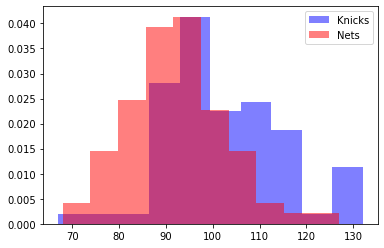

<Figure size 432x288 with 0 Axes>

In [7]:
plt.hist(knicks_pts_2010 , color="blue", label="Knicks", density=True, alpha=0.5)
plt.hist(nets_pts_2010 , color="red", label="Nets", density=True, alpha=0.5)
plt.legend()
plt.show()
plt.clf()

Now, let’s compare the 2010 games to 2014. Replicate the steps from the previous three exercises using nba_2014. First, calculate the mean difference between the two teams points scored. Save and print the value as diff_means_2014. Did the difference in points get larger or smaller in 2014? Then, plot the overlapping histograms. Does the mean difference you calculated make sense?

Knicks average points per game in 2014: 99
Nets average points per game in 2014: 98
Average points difference between Knicks and Nets in 2014: 1


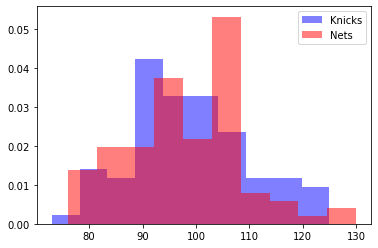

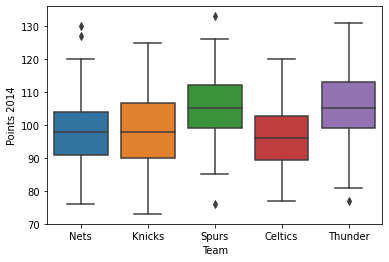

<Figure size 432x288 with 0 Axes>

In [9]:
#4 Average points in 2014
knicks_pts_2014 = nba_2014.pts[nba_2014.fran_id == "Knicks"]
nets_pts_2014 = nba_2014.pts[nba_2014.fran_id == "Nets"]
knicks_pts_mean_2014 = round(np.mean(knicks_pts_2014))
nets_pts_mean_2014 = round(np.mean(nets_pts_2014))
# means difference in 2014
diff_means_2014 = abs(knicks_pts_mean_2014 - nets_pts_mean_2014)
print("Knicks average points per game in 2014: " + str(knicks_pts_mean_2014))
print("Nets average points per game in 2014: "  + str(nets_pts_mean_2014))
print("Average points difference between Knicks and Nets in 2014: " + str(diff_means_2014))
# histogram for 2014
plt.hist(knicks_pts_2014 , color="blue", label="Knicks", density=True, alpha=0.5)
plt.hist(nets_pts_2014 , color="red", label="Nets", density=True, alpha=0.5)
plt.legend()
plt.show()
plt.clf()
# boxplot of points for 5 teams in 2014
sns.boxplot(data=nba_2014, x='fran_id', y = 'pts')
plt.ylabel('Points 2014')
plt.xlabel('Team')
plt.show()
plt.clf()

For the remainder of this project, we’ll focus on data from 2010. Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game.

Using nba_2010, generate side-by-side boxplots with points scored (pts) on the y-axis and team (fran_id) on the x-axis. Is there any overlap between the boxes? Does this chart suggest that fran_id and pts are associated? Which pairs of teams, if any, earn different average scores per game?

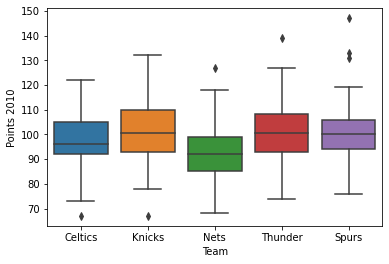

<Figure size 432x288 with 0 Axes>

In [10]:
# boxplot of points for 5 teams in 2010
sns.boxplot(data=nba_2010, x='fran_id', y = 'pts')
plt.ylabel('Points 2010')
plt.xlabel('Team')
plt.show()
plt.clf()

*Analyzing relationships between Categorical variables*

The variable game_result indicates whether a team won a particular game ('W' stands for “win” and 'L' stands for “loss”). The variable game_location indicates whether a team was playing at home or away ('H' stands for “home” and 'A' stands for “away”). Do teams tend to win more games at home compared to away?

Data scientists will often calculate a contingency table of frequencies to help them determine if categorical variables are associated. Calculate a table of frequencies that shows the counts of game_result and game_location.

Save your result as location_result_freq and print your result. Based on this table, do you think the variables are associated?

In [11]:
location_result_freq = pd.crosstab(nba_2010.game_location, nba_2010.game_result)
print(location_result_freq)

game_result      L    W
game_location          
A              133   92
H              105  120



Convert this table of frequencies to a table of proportions and save the result as location_result_proportions. Print your result.

In [12]:
location_result_proportions = location_result_freq/len(nba_2010)
print(location_result_proportions)

game_result           L         W
game_location                    
A              0.295556  0.204444
H              0.233333  0.266667


Using the contingency table created in the previous exercise, calculate the expected contingency table (if there were no association) and the Chi-Square statistic and print your results. Does the actual contingency table look similar to the expected table — or different? Based on this output, do you think there is an association between these variables?

In [14]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(np.round(expected))
print("If expected table values are different from observed table it indicates assosiation between variables")
print("If chi2 is above 4 it indicates that variables are associated")
print("chi2 equals: " + str(round(chi2,1)))

[[119. 106.]
 [119. 106.]]
If expected table values are different from observed table it indicates assosiation between variables
If chi2 is above 4 it indicates that variables are associated
chi2 equals: 6.5


*Analyzing Relationships Between Quantitative Variables*


For each game, 538 has calculated the probability that each team will win the game. In the data, this is saved as forecast. The point_diff column gives the margin of victory/defeat for each team (positive values mean that the team won; negative values mean that they lost). Did teams with a higher probability of winning (according to 538) also tend to win games by more points?

Using nba_2010, calculate the covariance between forecast (538’s projected win probability) and point_diff (the margin of victory/defeat) in the dataset. Save and print your result. Looking at the matrix, what is the covariance between these two variables?

In [15]:
cov_mat_forecast_point_diff = np.cov(nba_2010.forecast, nba_2010.point_diff)
print(cov_mat_forecast_point_diff)
print("Covariance equals to 1.37")

[[  0.05   1.37]
 [  1.37 186.56]]
Covariance equals to 1.37


Using nba_2010, calculate the correlation between forecast and point_diff. Save and print your result. Does this value suggest an association between the two variables?

In [16]:
corr_forecast_point_diff, p = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print("Correlation above absolute value of 0.3 suggests that there is a linear correlation. Correlation between forecast and point difference in 2010 is: "+str(round(corr_forecast_point_diff,2)))

Correlation above absolute value of 0.3 suggests that there is a linear correlation. Correlation between forecast and point difference in 2010 is: 0.44



Generate a scatter plot of forecast (on the x-axis) and point_diff (on the y-axis). Does the correlation value make sense?

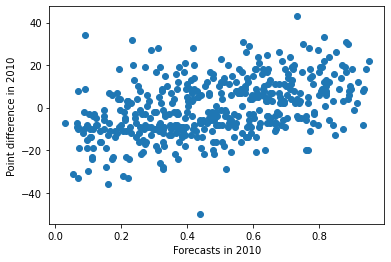

Linear correlation seems to be visible from the scatter chart above. The lower the forecast coeficient the higher negative point difference, the higher the forecast coeficient the higher positive point difference.


In [17]:
plt.scatter(x = nba_2010.forecast, y = nba_2010.point_diff)
plt.xlabel('Forecasts in 2010')
plt.ylabel('Point difference in 2010')
plt.show()
print("Linear correlation seems to be visible from the scatter chart above. The lower the forecast coeficient the higher negative point difference, the higher the forecast coeficient the higher positive point difference.")